<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/_Mini_Project_Linear_Classification_with_Wine_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

## Getting to know the Data

In [2]:
data = load_wine()

In [ ]:
data

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
data.target_names # 3 classes

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
data.feature_names # 13 features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
data.data.shape

(178, 13)

## Preprocessing

In [31]:
# X will be the data and y will be the target values
X = data.data
y = data.target

In [32]:
X.shape

(178, 13)

In [33]:
y.shape

(178,)

In [35]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N, D = X_train.shape

In [36]:
# Standard Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
y.shape

(178,)

### How do I make the data.target, which are classes 0,1 and 2 into [1,0,0], [0,1,0] and [0,0,1]?

## Model

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(10, activation = 'relu', input_shape = (D, )))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                140       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [54]:
r = model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
4/4 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4874
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5126
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5378
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5546
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5714
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5798
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5966
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.6303
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6303
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.6218

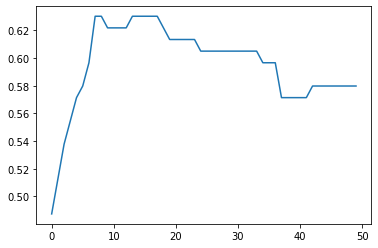

In [56]:
plt.plot(r.history['accuracy']) # It was over-fitting

### Would it be OK to add more dense layers?